In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('dunnhumbyGrocery/product.csv')
dfTr = pd.read_csv('dunnhumbyGrocery/transaction_data.csv')
demodf = pd.read_csv('dunnhumbyGrocery/hh_demographic.csv')
campdf = pd.read_csv('dunnhumbyGrocery/campaign_desc.csv')
coupdf = pd.read_csv('dunnhumbyGrocery/coupon.csv')
coupredf = pd.read_csv('dunnhumbyGrocery/coupon_redempt.csv')
camphkdf = pd.read_csv('dunnhumbyGrocery/campaign_table.csv')

In [3]:
campdf = campdf.sort_values(by=['START_DAY', 'CAMPAIGN'], ascending=True)
campdf = campdf.merge(camphkdf[['household_key', 'CAMPAIGN']], on='CAMPAIGN', how='left')
campdf['#campaign']=campdf.groupby(by=['household_key'])['CAMPAIGN'].transform('count')
display(campdf.head())

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,household_key,#campaign
0,TypeA,26,224,264,17,5
1,TypeA,26,224,264,27,7
2,TypeA,26,224,264,212,5
3,TypeA,26,224,264,208,8
4,TypeA,26,224,264,192,5


In [4]:
houseRed = coupredf.groupby(['household_key'], as_index=False)['CAMPAIGN'].agg({'redeemed': pd.Series.nunique})
display(houseRed.head())

,household_key,redeemed
0,1,2
1,8,1
2,13,7
3,14,1
4,18,3


In [5]:
temp = pd.merge(campdf, houseRed, on='household_key', how='left')
temp['Sensitivity']= np.where(temp['redeemed']>0, 'Sensible', 'Not sensible')
dset= pd.merge(demodf, temp[['household_key','Sensitivity', '#campaign']], on=['household_key'],how="inner")
dset.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Sensitivity,#campaign
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,Sensible,8
1,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,Sensible,8
2,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,Sensible,8
3,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,Sensible,8
4,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,Sensible,8


In [6]:
totSales = dfTr.groupby(by='household_key', as_index=False)['SALES_VALUE'].sum().rename(columns={'SALES_VALUE': 'Total_sales'})
totVisits = dfTr.groupby(by='household_key', as_index=False)['BASKET_ID'].agg({'total_visits': pd.Series.nunique})
temp_basket = dfTr.groupby(['household_key','BASKET_ID'], as_index=False)['SALES_VALUE'].sum()
temp_median_basket = temp_basket.groupby(['household_key'], as_index=False)['SALES_VALUE'].median().rename(columns={'SALES_VALUE':'median_basket'})
temp_product = dfTr.groupby('household_key', as_index=False)['SALES_VALUE'].mean().rename(columns={'SALES_VALUE':'avg_price'})
dset = dset.merge(totSales, on='household_key').merge(totVisits, on='household_key').merge(temp_median_basket, on='household_key').merge(temp_product, on='household_key')
dset.drop_duplicates(inplace=True)
dset

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,Sensitivity,#campaign,Total_sales,total_visits,median_basket,avg_price
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,Sensible,8,4330.16,86,48.915,2.507331
8,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,Not sensible,4,3400.05,59,47.970,2.643896
12,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8,Sensible,10,5534.97,113,35.800,2.796852
22,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,Sensible,10,13190.92,275,40.960,5.617939
32,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,Not sensible,2,1512.02,98,12.685,2.924603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,35-44,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2494,Sensible,2,2120.93,35,50.570,3.437488
4197,45-54,A,75-99K,Homeowner,Unknown,3,1,2496,Sensible,5,4339.66,63,73.520,2.914480
4202,45-54,U,35-49K,Unknown,Single Male,1,None/Unknown,2497,Not sensible,3,7111.98,221,18.120,3.624862
4205,25-34,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,2498,Not sensible,6,2601.60,172,8.980,3.028638


In [7]:
dset.shape

(760, 14)

In [8]:
print(dset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 4211
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_DESC             760 non-null    object 
 1   MARITAL_STATUS_CODE  760 non-null    object 
 2   INCOME_DESC          760 non-null    object 
 3   HOMEOWNER_DESC       760 non-null    object 
 4   HH_COMP_DESC         760 non-null    object 
 5   HOUSEHOLD_SIZE_DESC  760 non-null    object 
 6   KID_CATEGORY_DESC    760 non-null    object 
 7   household_key        760 non-null    int64  
 8   Sensitivity          760 non-null    object 
 9   #campaign            760 non-null    int64  
 10  Total_sales          760 non-null    float64
 11  total_visits         760 non-null    int64  
 12  median_basket        760 non-null    float64
 13  avg_price            760 non-null    float64
dtypes: float64(3), int64(3), object(8)
memory usage: 89.1+ KB
None


In [9]:
dset.describe()

,household_key,#campaign,Total_sales,total_visits,median_basket,avg_price
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,1233.006579,5.543421,5775.182671,179.630263,27.873053,3.147942
std,734.881752,3.039608,3754.633689,131.766738,18.945631,0.740697
min,1.000000,1.000000,760.450000,28.000000,1.520000,1.345031
25%,596.750000,3.000000,3080.465000,101.000000,15.030000,2.671020
50%,1218.500000,5.000000,4838.825000,145.000000,23.622500,3.058743
75%,1908.000000,7.250000,7278.300000,217.000000,34.770000,3.532315
max,2499.000000,17.000000,27859.680000,1223.000000,129.830000,9.224196


In [10]:
dfPro = df.loc[df['PRODUCT_ID'] == 17249835, ('COMMODITY_DESC', 'SUB_COMMODITY_DESC')]
display(dfPro)

,COMMODITY_DESC,SUB_COMMODITY_DESC
91379,COLD CEREAL,ADULT CEREAL


In [11]:
df.dtypes

PRODUCT_ID               int64
MANUFACTURER             int64
DEPARTMENT              object
BRAND                   object
COMMODITY_DESC          object
SUB_COMMODITY_DESC      object
CURR_SIZE_OF_PRODUCT    object
dtype: object

In [12]:
display(df.head())
display(dfTr.tail())
display(demodf.head())

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0
2595731,1598,42305362535,711,14055192,1,6.99,3228,0.00,1520,102,0.0,0.0


,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [13]:
demodf["MARITAL_STATUS_CODE"].replace(['A', 'B', 'U'],['Married','Unknown','Single'],inplace=True)

In [14]:
trData = dfTr[['household_key','DAY','PRODUCT_ID', 'QUANTITY','SALES_VALUE', 'RETAIL_DISC', 'STORE_ID', 'BASKET_ID']].merge(df[['PRODUCT_ID','COMMODITY_DESC', 'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT']], on='PRODUCT_ID')
trData = trData.merge(demodf[['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'household_key']], on='household_key')

Group dataframe according to household key and day

In [15]:
houseKeys = trData.household_key.unique().tolist()
print(len(houseKeys))
ghDic = {}
ghGby = {}
hk100 = []
for x in houseKeys:
    ghDic['houseKey_' + str(x)] = trData.loc[trData['household_key'] == x]
    ghGby['houseKey_' + str(x)] = ghDic['houseKey_' + str(x)].groupby(['DAY'])
    if len(ghGby['houseKey_' + str(x)]) > 100:
        hk100.append(x)

801


Dictionary of housekey and day -- need to figure out how to make a key of housekeys and associated values of days.

In [16]:
groupDays = {}
groupDayIndexer = []
for x in ghGby.keys():
    for y in ghGby[x].DAY.unique().keys():
        groupDays[x+'Day_'+str(y)] = ghGby[x].get_group(y)

In [4]:
categorical_vars = ['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','KID_CATEGORY_DESC']
num_plots = len(categorical_vars)
total_cols = 2
total_rows = num_plots//total_cols
print(total_rows)

3


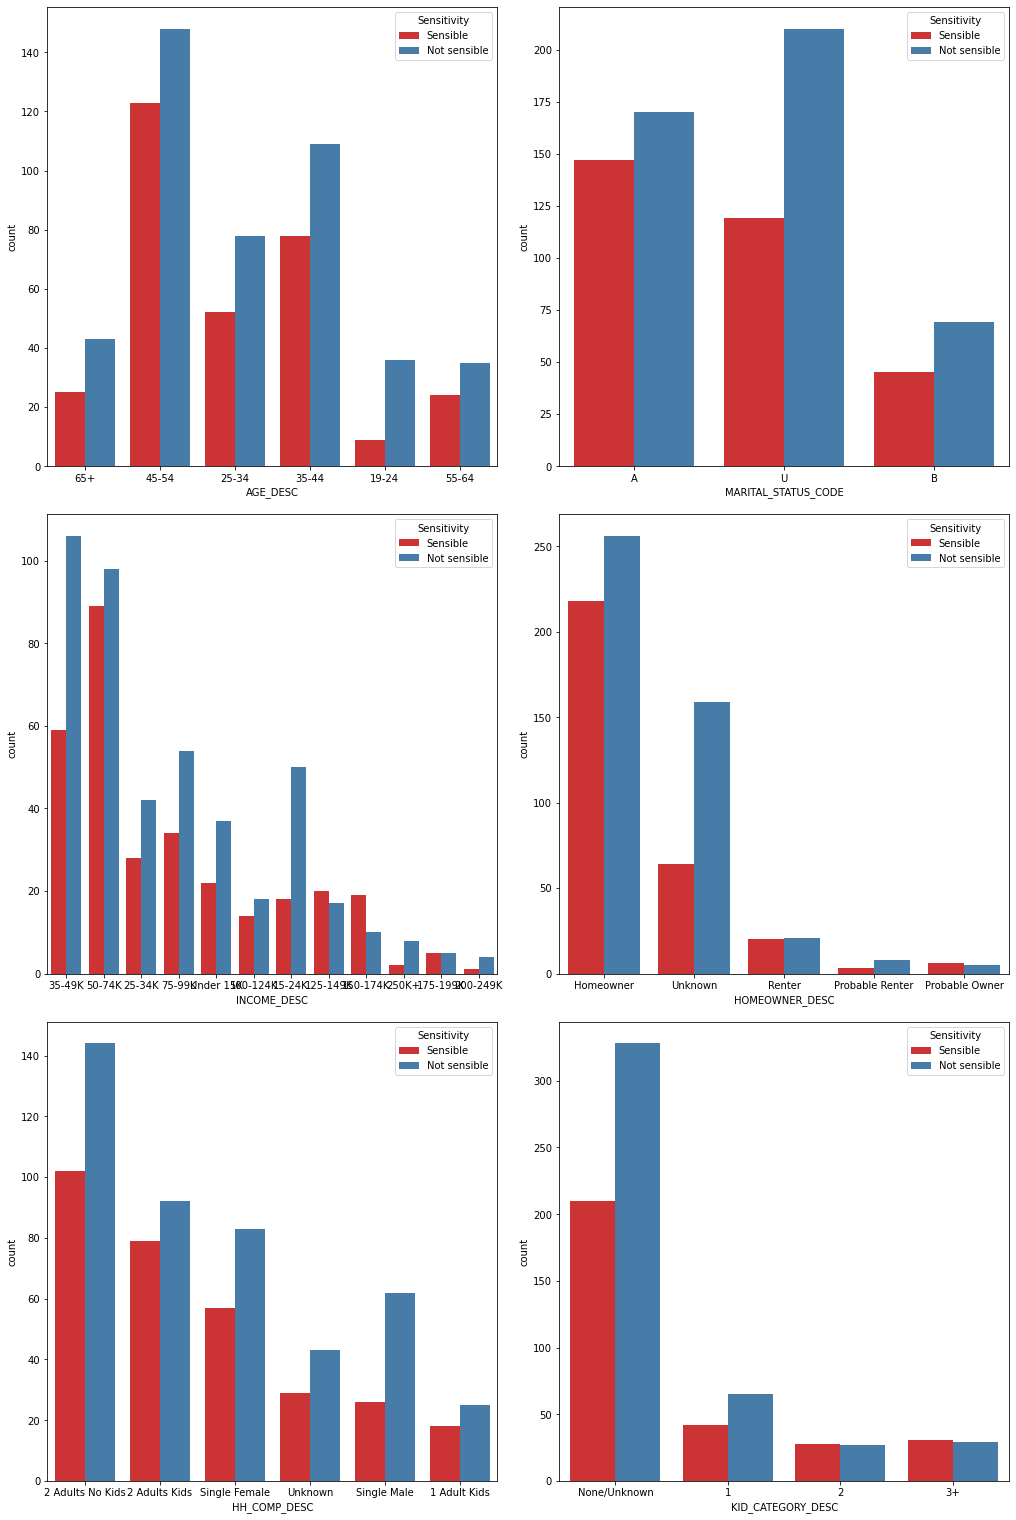

In [17]:
categorical_vars = ['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','KID_CATEGORY_DESC']
num_plots = len(categorical_vars)
total_cols = 2
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_vars):
    row = i//total_cols
    pos = i % total_cols    
    plot = sns.countplot(x=var, data=dset, ax=axs[row][pos],hue='Sensitivity',palette="Set1")

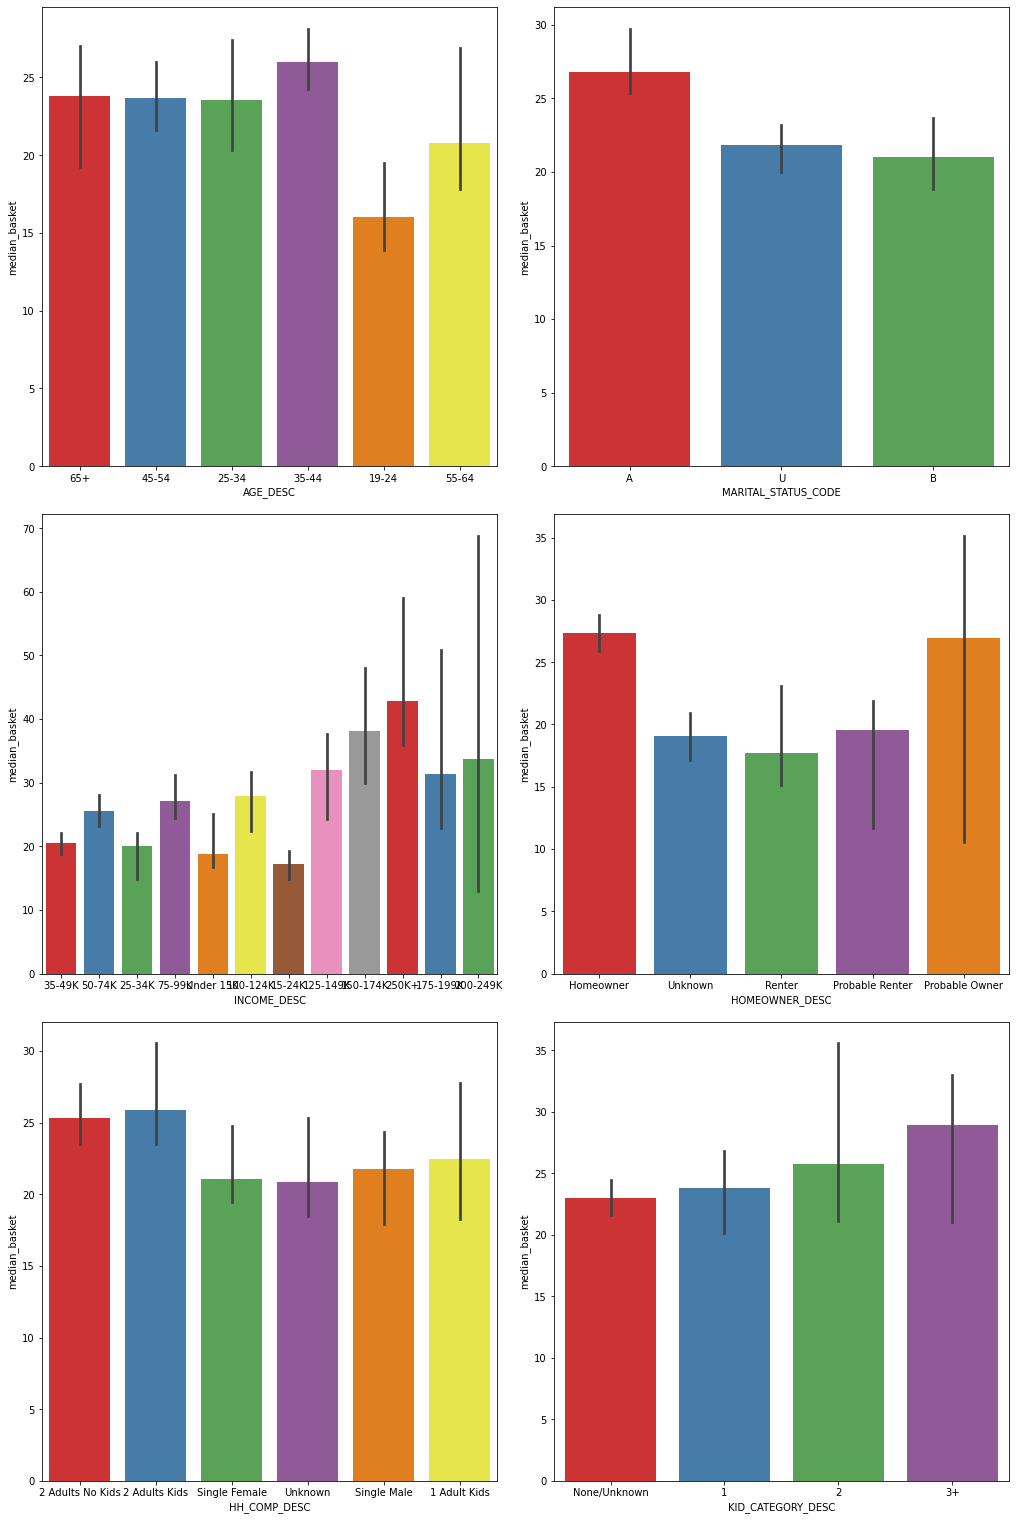

In [18]:
categorical_vars = ['AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOMEOWNER_DESC','HH_COMP_DESC','KID_CATEGORY_DESC']
num_plots = len(categorical_vars)
total_cols = 2
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(categorical_vars):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.barplot(x=var, y='median_basket',data=dset, ax=axs[row][pos],palette="Set1",estimator=np.median)

In [19]:
pd.set_option('display.max_rows', 305)
print(trData.COMMODITY_DESC.value_counts())

SOFT DRINKS                       60183
FLUID MILK PRODUCTS               46760
BAKED BREAD/BUNS/ROLLS            45265
CHEESE                            41026
BAG SNACKS                        35357
FRZN MEAT/MEAT DINNERS            30500
YOGURT                            26842
SOUP                              25723
BEEF                              25707
VEGETABLES - SHELF STABLE         24184
FROZEN PIZZA                      21426
COLD CEREAL                       20235
TROPICAL FRUIT                    20134
CANDY - PACKAGED                  18691
LUNCHMEAT                         17618
CANDY - CHECKLANE                 17298
CRACKERS/MISC BKD FD              16754
COUPON/MISC ITEMS                 16406
CANNED JUICES                     15596
REFRGRATD JUICES/DRNKS            15586
EGGS                              15389
ICE CREAM/MILK/SHERBTS            14763
DELI MEATS                        14600
BAKED SWEET GOODS                 14426
CONVENIENT BRKFST/WHLSM SNACKS    13200


In [55]:
subcomms = ['YOGURT NOT MULTI-PACKS', 'BANANAS', 'GASOLINE-REG UNLEADED', 'CONDENSED SOUP', 'FRZN SS PREMIUM ENTREES/DNRS/N', 'SS ECONOMY ENTREES/DINNERS ALL', 
'FRZN BAGGED VEGETABLES - PLAIN', 'MAINSTREAM WHEAT/MULTIGRAIN BR', 'RTS SOUP: CHUNKY/HOMESTYLE ET', 'EGGS - LARGE', 'FRZN SS PREMIUM ENTREES/DNRS/T',
'EGGS - X-LARGE', 'POTATOES RUSSET (BULK&BAG)', 'ADULT CEREAL', 'CHOICE BEEF', 'COTTAGE CHEESE', 'PASTA: CANNED', 'YOGURT MULTI-PACKS', 'STRAWBERRIES',
'NON-CRBNTD DRNKING/MNERAL WATE', 'MEAT: TURKEY BULK', 'BEANS GREEN: FS/WHL/CUT', 'VARIETY BEANS - KIDNEY PINTO', 'LIQUID LAUNDRY DETERGENTS', 
'FRZN BREADED PREPARED CHICK', 'CORN', 'RICE SIDE DISH MIXES DRY', 'MEAT:HAM BULK', 'TUNA', 'CARROTS MINI PEELED', 'CHICKEN BREAST BONELESS',
 'PEANUT BUTTER', 'FRZN MULTI SERVE ENTREES ALL', 'TOMATOES: STEWED/DICED/CRMD', 'HEAD LETTUCE', 'BABY FOOD JUNIOR ALL BRANDS', 'SPRING WATER', 'POULTRY'
'NOODLES DRY', 'SPAGHETTI DRY', 'ONIONS SWEET (BULK&BAG)', 'CUCUMBERS', 'GRAPES RED', 'PEPPERS GREEN BELL', 'CELERY', 'HAM', 'TOOTHPASTE', 'PICKLES'
 'SHAMPOO', 'PREPARED BEANS - BAKED W/PORK', 'ORANGES NAVELS ALL', 'VARIETY LETTUCE', 'GRAPES WHITE', 'TOMATOES HOTHOUSE ON THE VINE', 'BROCCOLI WHOLE&CROWNS'
'CEREAL BARS', 'TOMATO SAUCE', 'FRZN BOXED VEGETABLES- VALUE A', 'ROLLS - PORK', 'BROTH', 'ENTREES', 'INSTANT OATMEAL', 'MEAT: LUNCHMEAT BULK',
 'APPLES GALA (BULK&BAG)', 'POTATOES: DRY', 'LIQUID DISH DETERGENT', 'ONIONS OTHER', 'TOMATOES VINE RIPE BULK', 'PINEAPPLE', 'CHICKEN BREAST BONE IN',
'EGGS - MEDIUM', 'MEAT: SAUS DRY BULK', 'SELECT BEEF', 'ECONOMY - MEAT', 'BREAST - BONELESS(IQF)', 'CANTALOUPE WHOLE', 'APPLES RED DELICIOUS (BULK&BAG',
 'PEAS GREEN', 'LEMONS', 'TOMATOES GRAPE', 'APPLES GRANNY SMITH (BULK&BAG)', 'RYE BREADS', 'ONIONS YELLOW (BULK&BAG)', 'MUSHROOMS CND & GLASS',
'ONIONS WHITE (BULK&BAG)', 'LINKS - RAW', 'POTATOES RED (BULK&BAG)', 'DRY SOUP', 'POTATOES SWEET&YAMS', 'PEACHES YELLOW FLESH', 'MELON HALVES/QUARTERS',
 'PATTIES', 'ASPARAGUS', 'APPLES GOLD DELICIOUS (BULK&BA', 'RICE - INSTANT & MICROWAVE', 'VEGETABLES ALL OTHER', 'CABBAGE', 'MUSHROOMS W/WHOLE PKG',
'FRESH', 'GRND/PATTY - FROZEN', 'VEGETABLE SALADS - PREPACK', 'PEACHES', 'BLUEBERRIES', 'ROMA TOMATOES (BULK/PKG)', 'RAISINS', 'MEAT: BEEF BULK', 
 'FLOUR: WHITE & SELF RISING', 'PEPPERS RED BELL', 'ONIONS RED (BULK&BAG)', 'APPLES OTHER (BULK&BAG)', 'CORN YELLOW', 'FRZN BAGGED VEGETABLES- VALUE',
'FRZN BOXED VEGETABLES - PLAIN', 'MUSHROOMS WHITE SLICED PKG', 'TOMATO PASTE', 'MANDARIN ORANGES/CITRUS SECT', 'SEAFOOD-FRZ-RAW FILLETS', 'RIBS', 
 'PANCAKE MIXES', 'VEG JUICE (EXCEPT TOMATO) (OVE', 'CHICKEN DRUMS', 'FREEZER BAGS', 'GARLIC WHOLE CLOVES', 'NATURAL BEEF', 'RIPE OLIVES', 'SOUP/STEW',
'APPLE SAUCE', 'ORGANIC SALAD MIX', 'SQUASH ZUCCHINI', 'PLUMS', 'PEARS', 'SALAD SPINACH', 'CARROTS BAGGED', 'GRAPE JUICE (OVER 50% JUICE)', 'POTATOES OTHER'
 'DRIED FRUIT - OTHER', 'RICE - DRY BAG AND BOX', 'BEANS', 'SHAVE CREAMS AND POWDERS', 'RAZORS AND BLADES', 'YOGURT', 'SOY/RICE MILK', 'FROZEN FRUIT',
'CAULIFLOWER WHOLE', 'WHOLE CHICKEN (ROASTERS/FRYER)', 'CUT VEGETABLES ALL OTHER', 'PREMIUM - BEEF', 'RICE CAKES', 'SEAFOOD-FRZ-IQF RAW SHRIMP RW',
 'AVOCADO', 'FRZN MEAT ALTERNATIVES', 'DRY BEANS/PEAS/BARLEY: BAG & B', 'WATERMELON SEEDLESS WHOLE', 'MUSHROOMS PORTABELLA', 'SPINACH & GREENS', 
'MISCELLANEOUS VEGETABLES', 'OLIVE OIL', 'STANDARD OATMEAL', 'GREEN OLIVES', 'GRAPEFRUIT', 'GREENS', 'SEAFOOD-FRE-RAW FINFISH-OTHER', 'TOMATOES VINE RIPE PKG',
 'SEAFOOD-FRE-NON RW-ALL', 'GROUND TURKEY', 'CHICKEN THIGHS', 'PATTIES - RAW', 'NECTARINES YELLOW FLESH', 'PEPPERS ALL OTHER', 'CHICKEN-FULLY COOKED', 
'LOIN - CHOPS BONELESS', 'TOMATO JUICE (OVER 50% JCE)', 'RASPBERRIES', 'CHUNK MEATS - ALL', 'WINGS (IQF)', 'CARROTS', 'PEARS ANJOU', 'SNACK NUT(BAG)',
 'EGGS - JUMBO', 'FRZN BURGERS/BBQ/MEATBALL', 'CHICKEN WINGS', 'CUBED MEATS', 'PICKLD VEG PEPPERS ETC', 'HONEY', 'PINEAPPLE WHOLE&PEEL/CORED', 'VEGETABLE SALADS - BULK',
'APPLES FUJI (BULK&BAG)', 'PEARS BARTLETT', 'SAUERKRAUT', 'PORK-FULLY COOKED', 'ORGANIC CARROTS', 'BOUILLON', 'ORGANIC HERBS', 'KIWI FRUIT', 'ORGANIC VEGETABLES ALL OTHERS'
 'RICOTTA CHEESE', 'CHERRIES RED', 'TOMATOES CHERRY', 'RADISH', 'SEAFOOD-FRE-SALMON', 'SALMON', 'CLEMENTINES', 'KRAUT & CABBAGE', 'BEETS', 'FROZEN PASTA',
'SEAFOOD-FRZ-RW-ALL', 'INSTORE CUT VEGETABLES', 'HERBS PARSLEY', 'LINKS - COOKED', 'ORIENTAL VEGETABLES', 'CARROTS - BULK', 'GRAPES BLACK/BLUE', 'HAM- NET WEIGHT'
 'PROTIEN SALADS - BULK', 'VITAMIN - MULTIPLE COMBIN', 'POTATOES SWEET', 'FROZEN ENTREES', 'VEGETARIAN MEATS', 'MIXED VEGETABLES', 'NUTS OTHER', 'POTATOES GOLD (BULK&BAG)'
'HARD SQUASH', 'MEAT: CHICKEN BULK', 'PEPPERS OTHER BELL', 'BEEF - FULLY COOKED', 'POTATOES WHITE', 'VIENNA SAUSAGE', 'SEAFOOD-FRZ-BRD SHRIMP', 'SMOKED/COOKED - BEEF',
 'SOUPS', 'SEAFOOD-FRZ-IQF COOKED SHRIMP', 'CORN WHITE', 'YELLOW SUMMER SQUASH', 'TOMATOES HOT HOUSE BULK', 'BEEF STEW', 'ORGANIC TROPICAL FRUIT', 'APPLES BRAEBURN (BULK & BAG)',
'TANGERINES & TANGELOS', 'REFRIGERATED PASTA', 'ANGUS BEEF', 'FRZN CORN ON THE COB', 'HERBS CILANTO', 'PEANUTS ALL', 'LOIN - STK/CHP/SLC', 'GRITS', 'CORNMEAL', 'ALMONDS SHELLED',
 'FROZEN VEGETABLES', 'SEAFOOD-FRZ-MISC', 'PASTA/GRAIN SALADS - PREPACK', 'TOFU', 'VITAMIN - INDIVIDUAL', 'FLOUR: MISC SPECIALTY BLEND', 'BLACKBERRIES', 'COOKING BAGS WITH SPICES/SEASO'
'TOMATOES WHOLE', 'SOY BEVERAGE', 'EGGS', 'VITAMIN - CHILDREN', 'MISC.CND SEAFOODS (CRABETC)', 'SPINACH BULK', 'BREAD:PITA/POCKET BREADS', 'HAMS-WHOLE BONELESS', 'BUTTS', 
 'MEAT: TURKEY PPK/PRESLC', 'ORGANIC APPLES', 'CORN FRESH PACKAGED', 'ORIENTAL NOODLES RICE', 'PRUNE JUICE (OVER 50% JUICE)', 'ORGANIC VEGETABLES SALAD', 'SEAFOOD-FRE-CATFISH', 
'GRND/PATTY - CHUCK', 'FROZEN MEAT (VEGETARIAN)', 'SEAFOOD-FRE-MISC', 'PASTA/GRAIN SALADS - BULK', 'PEPPERS JALAPENO', 'MANGO', 'VITAMIN - NON HERBAL SUPPLEMEN', 'CARROTS SLICED/SHRED/STICKS',
 'SEASONED PORK', 'TURKEY BREAST BONELESS', 'GRAPEFRUIT JUICE (OVER 50% JUI)', 'HAMS-HALF/PORT BONELESS', 'YEAST: DRY', 'CHIX: CHICKEN DINNERS/SNACKS H', 'GROUND PORK', 'PECANS SHELLED',
'PEAS & ONIONS PEAS & CARROT', 'LEGGS', 'DL SPEC: DRY/REFRIG PASTAS', 'HAM STEAKS/CUBES/SLICES', 'VITAMIN - MINERALS', 'MARINATED PORK', 'SAUSAGE', 'SEAFOOD-FRE-LIVE SHLFSH-OTHER', 
 'GRND/PATTY - BEEF', 'RIBS - COUNTRY/WESTERN STYLE', 'BACON - BELLY/JOWL', 'PITA/TORTILLAS', 'COCONUT', 'ORGANIC BERRIES', 'FLOURS/GRAINS/SUGAR', 'PREP FOODS: SOUP - COLD', 'PASTA/RAMEN',
'MISC GRAIN MIXES', 'SALADS', 'SARDINES', 'TURKEY BREAST BONE IN', 'FRZN GRILLED PORTIONS', 'FRZN BREAD DOUGH', 'VEGETABLE PARTY TRAY', 'BROCCOLI/CAULIFLOWER PROCESSED', 'SEASONED POULTRY',
 'POULTRY - STEW W/DUMPLINGS/ A', 'GRANOLA', 'WHOLE HENS (UNDER 15LBS)', 'HAMS-HALF/PORT BONE-IN', 'ORGANIC BROCCOLI/CAULIFLOWER', 'LIMA BEANS', 'PUMPIKNS', 'APRICOTS', 'TROPICAL FRUIT - OTHER',
'VITAMIN - HERBAL SUPPLEMENTS', 'CUT FRUIT ALL OTHER', 'JARRED FRUIT', 'DRIED PLUMS', 'PISTACHIOS', 'LARGE - RICE CAKES', 'ORANGES NON NAVEL ALL', 'HERBS FRESH OTHER', 'PEARS BOSC',
 'CORNISH HEN', 'CELERY CHOPPED/STICKS', 'SEAFOOD-FRZ-RAW SHLFSH-OTHER', 'NUTS INSHELL', 'PEACHES WHITE FLESH', 'HAM - STEAKS/SLICES/CUBES', 'RICE BEVERAGE', 'MUSHROOMS OTHER', 'GROUND CHICKEN',
'VARIETY MEAT - CUBE/STW/STRP', 'DRUMS (IQF)', 'WALNUTS SHELLED', 'VEGETABLES/DRY BEANS', 'BREAST - BONELESS', 'PATTIES - COOKED', 'FLANK', 'THIGHS (IQF)', 'AUTHENTIC PASTA RICE BEANS', 
 'ECONOMY - BEEF', 'GRND/PATTY - ROUND', 'WHOLE - HENS (15 LBS & UNDER F', 'ORGANIC GRAPES', 'SHLDR - STK/CHP/SLC', 'NUTS', 'BROTHS', 'GRND/PATTY - SIRLOIN (90%+)', 'ORGANIC TOMATOES',
'RIB - STK/CHP/SLC', 'FROZEN BURGERS', 'RIBS - SPARE RIB/BACK RIB', 'SALAD: LETTUCE', 'ORGNAIC ONIONS', 'MUSHROOMS WHITE BULK', 'HAMS-WHOLE BONE-IN', 'CRANBERRIES', 'TURKEY DRUMS', 'ORGANIC POTATOES',
'MARINATED POULTRY', 'LOIN - WH/HALF BONELESS', 'CHICKEN LEGS/QUARTERS', 'DRIED FRUIT', 'WATER FILTER', 'SEAFOOD-FRZ-IQF RAW SHRIMP EXA', 'NECTARINES WHITE FLESH', 'KEFIR', 'ORGANIC DRIED FRUIT'
 'PREP FOODS: SOUP- HOT', 'MEATLESS/VEGETARIAN', 'FRZN MISC SEAFOOD', 'WATERMELON W/SEEDS WHOLE', 'SALADS CND (BEAN POTATO)', 'MIXED FRUIT BAGS', 'GRAINS', 'PEARS ASIAN', 'SEAFOOD-FRE-SHRIMP', 
'TOMATOES-OTHER', 'PROTEIN SALADS - PREPACK', 'POTATOES WHITE (BULK&BAG)', 'NUT BUTTERS/PEANUT BUTTER', 'CHUCK/SHOULDER', 'HAMS-DRY CURED/COUNTRY', 'ADULT INCONTINENCE BRIEFS', 'BABY BASICS', 
 'GREEN ONIONS', 'HAM - BONE-IN HALF/PORT', 'WATERMELON PERSONAL', 'TURKEY WINGS', 'MELONS WHOLE OTHER', 'LOIN - ROAST', 'AUTHENTIC SOUP BOUILLONS', 'WHOLE HEN (UNDER 15LBS)', 'SPICES/SEASONING',
'VEG JUICE (EXCEPT TOMATO) (50%)', 'CHERRIES (EXCEPT MARASCHINO)', 'PAPAYA', 'HERBS DRIED', 'TURKEY HALVES/QUARTERS', 'CHIX: ROTISSERIE COLD', 'MACKEREL', 'WHOLE - TOM (16 LBS & OVER FRZ)', 
 'VARIETY MEAT - EXTERNAL', 'KABOBS BEEF', 'ORGANIC SQUASH', 'BREADED - CHICKEN', 'PRIME BEEF', 'VEGETARIAN MISC', 'FROZEN MISC', 'STUFFED/MIXED POULTRY', 'PEARS OTHER', 'SHLDR - BUTT', 'KABOBS POULTRY'
'PINEAPPLE WEDGE/SLICED/CHUNKS', 'AUTHENTIC VEGETABLES AND FOODS', 'RIB - SPARE RIB/BACK RIB', 'HAM - BONELESS WHOLE', 'TURKEY PARTS SMOKED', 'CHICKEN', 'BLEND/MIX', 'WHOLE HEN (OVER 15LBS)'
'ORGANIC PEPPERS ALL', 'ORGANIC PEARS', 'FROZEN MEAT', 'BREAST - BONE-IN (FRZ)', 'NUT SUPP-C VITAMINS', 'NATURAL', 'ORGANIC VALUE ADDED VEGETABLES', 'ORGANIC MUSHROOMS', 'LOIN - WH/HALF BONE-IN',
'ROUND/LEG - STK/CHP/SLC', 'THIN MEATS', 'DATES', 'LOIN', 'HAM - BONE-IN WHOLE', 'MEDICATED FIRST AID DRESSING/C', 'NUT SUPP-PROTEIN-FOOD STAMPABL', 'THERMAL ANALGESICS', 'GRAPES OTHER', 'BERRIES CND (BLUBLKRASP)',
'ORGANIC MELONS', 'BABY FURNITURE ACCESSORIES', 'PREP FD: SEAFD ENTREES (HOT)', 'PREP FD: HISPANIC (COLD)', 'CORN BI-COLOR', 'BRISKET', 'DIET/NUTRITION VITAMIN (ADULT', 'NATURAL FOODS SNACKS', 'APPLES CRABAPPLES', 
'VEGETABLE', 'VITAMIN - ADULT ONLY SUPPLEMEN', 'VITAMIN MISC', 'MUSHROOMS DRIED', 'ORGANIC NUTS', 'MEDICATED BABY POWDER', 'VEGETABLE SEEDS']

In [229]:
comms = ['FRZN MEAT/MEAT DINNERS', 'YOGURT', 'SOUP', 'BEEF', 'VEGETABLES - SHELF STABLE', 'TROPICAL FRUIT',
'EGGS', 'FRZN VEGETABLE/VEG DSH', 'VEGETABLES - ALL OTHERS', 'FRUIT - SHELF STABLE', 'MEAT - SHELF STABLE',
'DRY BN/VEG/POTATO/RICE', 'BABY FOODS', 'SALAD MIX', 'BAKING MIXES', 'DINNER MXS:DRY', 'ONIONS',
'DRY NOODLES/PASTA', 'CHICKEN', 'POTATOES', 'TOMATOES', 'BAKING NEEDS', 'APPLES', 'DOG FOODS',
'PASTA SAUCE', 'PORK', 'BEANS - CANNED GLASS & MW', 'BERRIES', 'CITRUS', 'VEGETABLES SALAD', 'GRAPES',
'HOT DOGS', 'DINNER SAUSAGE', 'PEPPERS-ALL', 'SALAD BAR', 'BREAD', 'CARROTS', 'FROZEN MEAT', 
'SEAFOOD - SHELF STABLE', 'SEAFOOD - FROZEN', 'REFRIGERATED', 'MEAT - MISC', 'FROZEN BREAD/DOUGH',
'SALADS/DIPS', 'SOAP - LIQUID & BAR', 'STATIONERY & SCHOOL SUPPLIES', 'ORGANICS FRUIT & VEGETABLES',
'VALUE ADDED FRUIT', 'PICKLE/RELISH/PKLD VEG', 'STONE FRUIT', 'HEAT/SERVE', 'BROCCOLI/CAULIFLOWER',
'MUSHROOMS', 'SNACK NUTS', 'CHICKEN/POULTRY', 'MELONS', 'SEAFOOD-FRESH', 'SHAVING CARE PRODUCTS',
'HERBS', 'DRIED FRUIT', 'BROOMS AND MOPS', 'BLEACH', 'FROZEN', 'FITNESS&DIET', 'OLIVES', 'FLOUR & MEALS', 'TURKEY',
'CORN', 'SQUASH', 'VALUE ADDED VEGETABLES', 'VITAMINS', 'INFANT FORMULA', 'PEARS', 'NUTS', 'CEREAL/BREAKFAST',
'WATER', 'RICE CAKES', 'FRZN FRUITS', 'SEAFOOD - MISC', 'PREPARED/PKGD FOODS', 'FROZEN - BOXED(GROCERY)', 'BABYFOOD',
'FAMILY PLANNING', 'IRONING AND CHEMICALS', 'FROZEN CHICKEN', 'PACKAGED NATURAL SNACKS', 'HOME FREEZING & CANNING SUPPLY',
'EXOTIC GAME/FOWL', 'GLASSWARE & DINNERWARE', 'LAMB', 'VEAL', 'FRZN SEAFOOD', 'RW FRESH PROCESSED MEAT', 'NATURAL VITAMINS']

ratecomms = {}

rates = [6, 9, 5, 6, 7, 7, 8, 9, 8, 8, 7, 9, 9, 9, 5, 5, 9, 9, 9, 8, 9, 5, 9, 7,
            4, 5, 9, 9, 9, 9, 9, 5, 5, 9, 9, 6, 9, 7, 8, 8, 7, 6, 7, 8, 9, 9, 10, 9, 8, 9, 5, 9,
            9, 9, 8, 9, 9, 7, 8, 9, 7, 7, 9, 7, 8, 9, 7, 8, 9, 9, 9, 9, 9, 9, 8, 10, 9, 10, 9,
            7, 10, 9, 9, 8, 9, 8, 9, 7, 7, 7, 7, 9, 7, 9]

for x in range(len(comms)):
    X = trData.loc[trData.COMMODITY_DESC == comms[x]]
    X = dict(enumerate(X.SUB_COMMODITY_DESC.unique().flatten(),0))
    X = dict([(value, rates[x]) for key, value in X.items()])
    ratecomms[comms[x]] = X

In [240]:
keys2remove = ['PIZZA/PREMIUM', 'RAMEN NOODLES/RAMEN CUPS', 'HOT DOG CHILI SAUCE', 'TAMALES (STOCKED N/CANNED MEAT)',
              'FROSTING', 'MACARONI & CHEESE DNRS', 'SEASONAL CANDY BAGS-CHOCOLATE', 'MARSHMALLOW CREME', 'CAKE DECORS - BIRTHDAY CANDLES',
              'CAKE DECORS & ICING', 'MARSHMALLOWS', 'MARASCHINO CHERRIES', 'AS SEEN ON TV', 'CORN DOGS', 'PIZZA',
              'JUICE (UNDER 10% JUICE)', 'JUICE (UNDER 50% JUICE)', 'CHEESE:CHEESEBALLS/SPREADS', 'CARAMEL COATED SNACKS',
              'CANDY BAGS-CHOCOLATE', 'CANDY BOXED CHOCOLATES', 'GUM (PACKAGED)', 'DESIGNER FRAGRANCES', 'FROZEN DESSERT (ICE CREAM CAKE',
              'FROZEN ICE CREAM', 'FROZEN CONVENIENCE/POCKETS', 'FROZEN PIZZA', 'DIET CNTRL POWDERS NUTRITIONAL', 'DIET CNTRL LIQS NUTRITIONAL',
              'DIET CNTRL BARS NUTRITIONAL', 'EASTER BASKETS', 'SUSHI - PREPACKAGED', 'CANDY', 'CHEESE:PROCESSED PREPORTND', 
              'NOVELTY CANDY', 'EASTER BASKETS', 'PROMO']

for x in keys2remove:
    for i in range(len(comms)):
        if x in ratecomms[comms[i]]:
            print(ratecomms[comms[i]][x])
            del ratecomms[comms[i]][x]

{'FRZN SS PREMIUM ENTREES/DNRS/N': 6, 'SS ECONOMY ENTREES/DINNERS ALL': 6, 'FRZN BREADED PREPARED CHICK': 6, 'FRZN MULTI SERVE ENTREES ALL': 6, 'FRZN SS PREMIUM ENTREES/DNRS/T': 6, 'FROZEN PASTA': 6, 'FRZN MEAT ALTERNATIVES': 6, 'FRZN REGIONAL/OTHER': 6, 'SNACKS/APPETIZERS': 6, 'FROZEN MEAT (VEGETARIAN)': 6, 'PORK-FULLY COOKED': 6, 'FRZN BURGERS/BBQ/MEATBALL': 6, 'CHICKEN-FULLY COOKED': 6, 'FROZEN ENTREES': 6}


In [250]:
values_view = ratecomms.values()
value_iterator = iter(values_view)
first_value = next(value_iterator)

print(first_value)

{'FRZN SS PREMIUM ENTREES/DNRS/N': 6, 'SS ECONOMY ENTREES/DINNERS ALL': 6, 'FRZN BREADED PREPARED CHICK': 6, 'FRZN MULTI SERVE ENTREES ALL': 6, 'FRZN SS PREMIUM ENTREES/DNRS/T': 6, 'FROZEN PASTA': 6, 'FRZN MEAT ALTERNATIVES': 6, 'FRZN REGIONAL/OTHER': 6, 'SNACKS/APPETIZERS': 6, 'FROZEN MEAT (VEGETARIAN)': 6, 'PORK-FULLY COOKED': 6, 'FRZN BURGERS/BBQ/MEATBALL': 6, 'CHICKEN-FULLY COOKED': 6, 'FROZEN ENTREES': 6}


In [256]:
comms = []
subcomms = []

for x, y in ratecomms.items():
    comms.append(x)
    subcomms.append(pd.DataFrame.from_dict(y, orient='index'))

dataframe = pd.concat(subcomms, keys=comms)

dataframe.to_excel("output.xlsx") 

In [53]:
pd.set_option('display.max_rows', len(trData.SUB_COMMODITY_DESC.value_counts()))

print(trData.SUB_COMMODITY_DESC.value_counts())

FLUID MILK WHITE ONLY             35424
YOGURT NOT MULTI-PACKS            22360
SOFT DRINKS 12/18&15PK CAN CAR    20927
SFT DRNK 2 LITER BTL CARB INCL    18126
BANANAS                           17937
GASOLINE-REG UNLEADED             14772
SHREDDED CHEESE                   14680
MAINSTREAM WHITE BREAD            13722
CANDY BARS (SINGLES)(INCLUDING    12373
POTATO CHIPS                      11523
PREMIUM                           10395
CONDENSED SOUP                    10127
FRZN SS PREMIUM ENTREES/DNRS/N     9779
DAIRY CASE 100% PURE JUICE - O     9400
BEERALEMALT LIQUORS                9235
SS ECONOMY ENTREES/DINNERS ALL     8554
SNACK CAKE - MULTI PACK            8376
KIDS CEREAL                        8330
FRZN BAGGED VEGETABLES - PLAIN     8025
TORTILLA/NACHO CHIPS               7647
MAINSTREAM WHEAT/MULTIGRAIN BR     7425
PRIMAL                             7307
RTS SOUP: CHUNKY/HOMESTYLE ET      7250
EGGS - LARGE                       7075
TOILET TISSUE                      6980


In [23]:
X = trData.loc[trData.COMMODITY_DESC == 'APPAREL']
print(X.SUB_COMMODITY_DESC.unique())

['MENS ACTIVEWEAR ADIDAS' 'MISC. SEASONAL ITEMS' 'LADIES SANDALS'
 'UPDATED WOVENS' 'SEASONAL' 'DECOR' 'MENS SS SPT SHIRT' 'FM-MLB'
 'FM-COLLEGIATE' 'CONTINUITY: FRAMES' 'SPECIALTY FOOTWEAR'
 'LADIES CASUAL SHOES' 'EASTER BASKETS' 'LADIES ACTIVE TOPS'
 'ALL UNDERWEAR' 'MENS HANES UNDERWEAR' 'BANDANA/SCARVES'
 'EASTER EGG COLORING' 'FM-NFL' 'MENS PAJAMAS' 'DOG & CAT CHEMICALS'
 'HANES PANTIES' 'WOMENS COMFORT SHOES' 'MISC. HAIR CARE'
 'MENS ARCTIC FLEECE SHIRT' 'MENS RUBBERWEAR' 'MAYBELLINE'
 'MENS FASHION UNDERWEAR' '4-20 BOYS TEAM SPORT'
 'SCREEN PRINT TOPS GIRLS 7-16' 'YNG MEN SCREEN PRINT T-SHIRTS'
 'MENS JACKETS NATURAL FIBER' 'LADIES SPORT SOCKS'
 'SPORTS LICENSE PRODUCTS' 'MISSY TRAD KNIT TOPS' 'MENS KNIT WEAR']


In [50]:
xprice = trData.loc[trData.SUB_COMMODITY_DESC == 'KITCHEN/DINING']
print(xprice)

        household_key  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  RETAIL_DISC  \
944735            442  556    15574274         1        64.99        -5.00   
944736            442  556    15574274         1        64.99        -5.00   
944763            442  690    17105328         1       134.69       -14.97   

        STORE_ID    BASKET_ID    COMMODITY_DESC SUB_COMMODITY_DESC  \
944735     34011  40128458210  HOME FURNISHINGS     KITCHEN/DINING   
944736     34011  40128458218  HOME FURNISHINGS     KITCHEN/DINING   
944763     34011  42009228951  HOME FURNISHINGS     KITCHEN/DINING   

       CURR_SIZE_OF_PRODUCT AGE_DESC MARITAL_STATUS_CODE INCOME_DESC  \
944735                         25-34              Single      15-24K   
944736                         25-34              Single      15-24K   
944763                         25-34              Single      15-24K   

       HOMEOWNER_DESC  HH_COMP_DESC HOUSEHOLD_SIZE_DESC KID_CATEGORY_DESC  
944735        Unknown  1 Adult Kids      